In [1]:
import numpy as np

fish_length = np.array([25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0])

fish_weight = np.array([242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9])

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_length, fish_weight, random_state=37)

In [5]:
test_input = test_input.reshape(-1,1)
train_input = train_input.reshape(-1,1)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

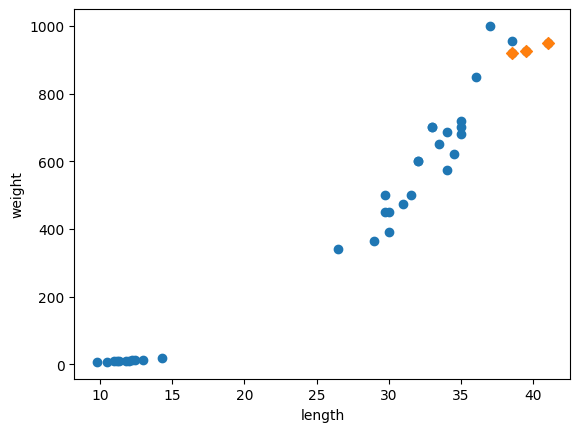

In [8]:
distances, indexes = knr.kneighbors([[49]])

import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')

plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [12]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [29]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[30**2, 30]]))

[714.86720588]


In [30]:
print(lr.coef_, lr.intercept_)

[  0.97838267 -15.36633908] 54.170302097908746


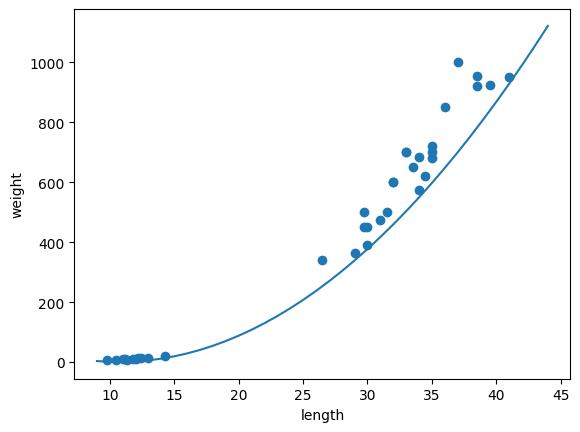

In [21]:
point = np.arange(9,45)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

#plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
import pickle
with open("linearReg.pkl", "wb") as f:
    pickle.dump(lr, f)

with open("linearReg.pkl", "rb") as f:
    fish_model = pickle.load(f)

fish_model.predict([[35**2, 35]])

array([714.86720588])

In [ ]:
a = lr.coef[0]
b = lr.coef[1]
c = lr.intercept_